Importing libraries

In [6]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import missingno as missing
import seaborn as sns
sns.set_style('whitegrid')
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score ,auc, plot_roc_curve
from sklearn import svm
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Ignoring Warnings

In [15]:
import warnings
warnings.filterwarnings('ignore')

Loading the data

In [16]:
df = pd.read_csv("b_depressed.csv")
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


Training Data Info

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [18]:
df.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


Exploratory Data Analysis

Checking for Skewness

<AxesSubplot:xlabel='no_lasting_investmen', ylabel='Density'>

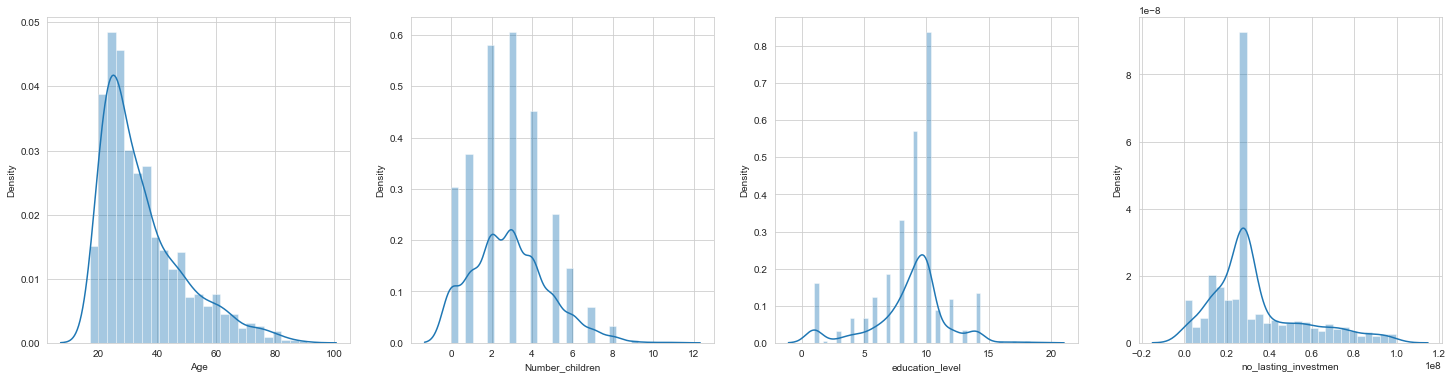

In [21]:
plt.figure(figsize=(25,6))
plt.subplot(1,4,1)
sns.distplot(df['Age'])

plt.subplot(1,4,2)
sns.distplot(df['Number_children'])

plt.subplot(1,4,3)
sns.distplot(df['education_level'])

plt.subplot(1,4,4)
sns.distplot(df['no_lasting_investmen'])

<AxesSubplot:xlabel='durable_asset', ylabel='Density'>

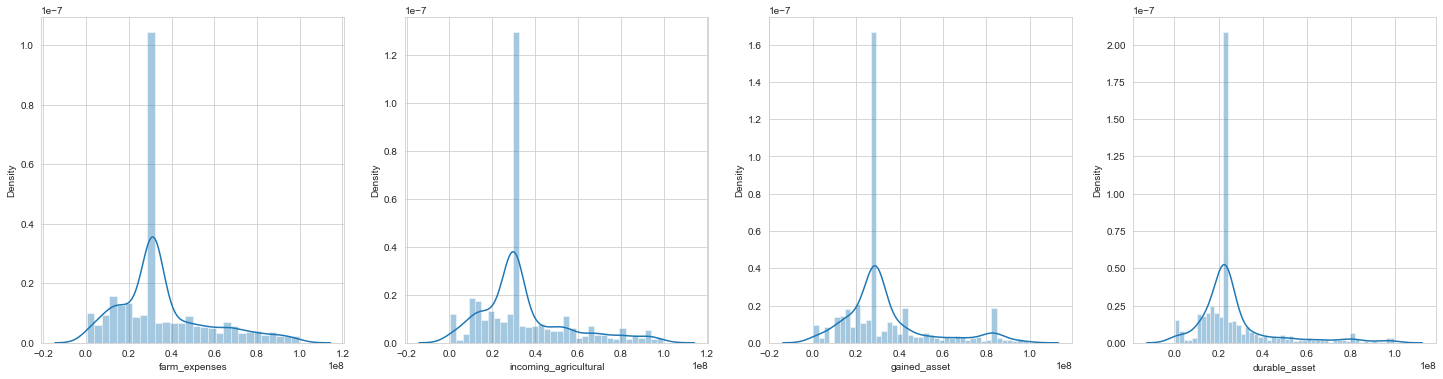

In [23]:
plt.figure(figsize=(25,6))
plt.subplot(1,4,1)
sns.distplot(df['farm_expenses'])

plt.subplot(1,4,2)
sns.distplot(df['incoming_agricultural'])

plt.subplot(1,4,3)
sns.distplot(df['gained_asset'])

plt.subplot(1,4,4)
sns.distplot(df['durable_asset'])

Relation between Features and Depression

Personal Info Vs Depression

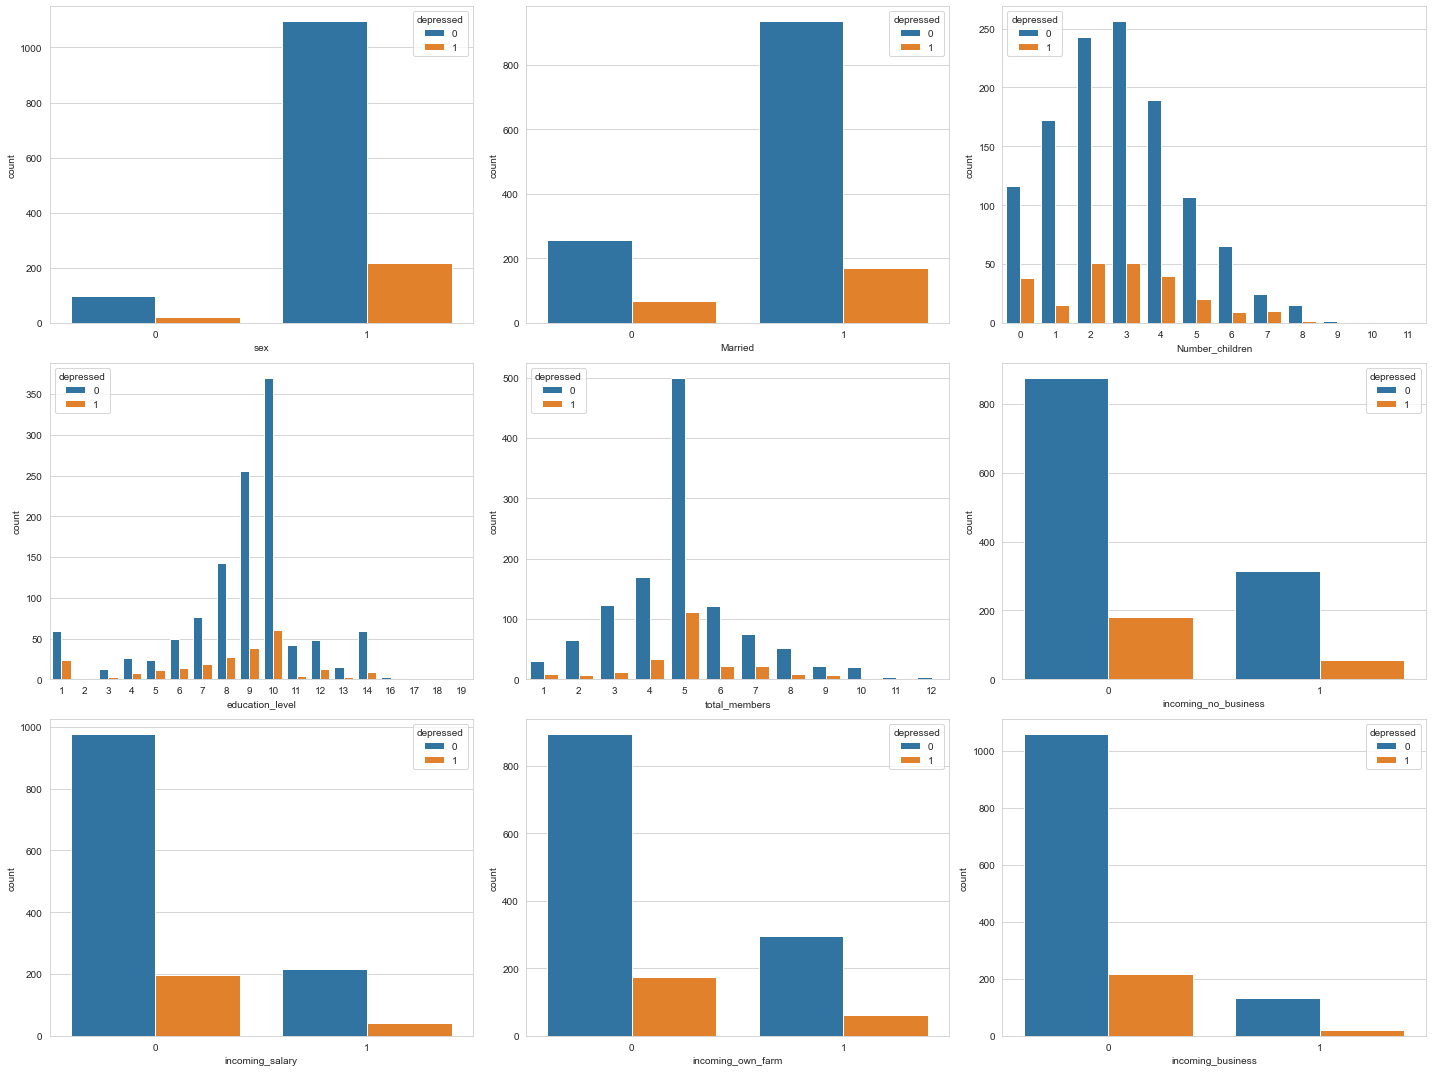

In [24]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='sex', hue='depressed', data=df)
plt.subplot(3,3,2)
sns.countplot(x='Married', hue='depressed', data=df)
plt.subplot(3,3,3)
sns.countplot(x='Number_children', hue='depressed', data=df)

plt.subplot(3,3,4)
sns.countplot(x='education_level', hue='depressed', data=df)
plt.subplot(3,3,5)
sns.countplot(x='total_members', hue='depressed', data=df)
plt.subplot(3,3,6)
sns.countplot(x='incoming_no_business', hue='depressed', data=df)

plt.subplot(3,3,7)
sns.countplot(x='incoming_salary', hue='depressed', data=df)
plt.subplot(3,3,8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=df)
plt.subplot(3,3,9)
sns.countplot(x='incoming_business', hue='depressed', data=df)

plt.tight_layout()
plt.show()


<Figure size 1800x432 with 0 Axes>

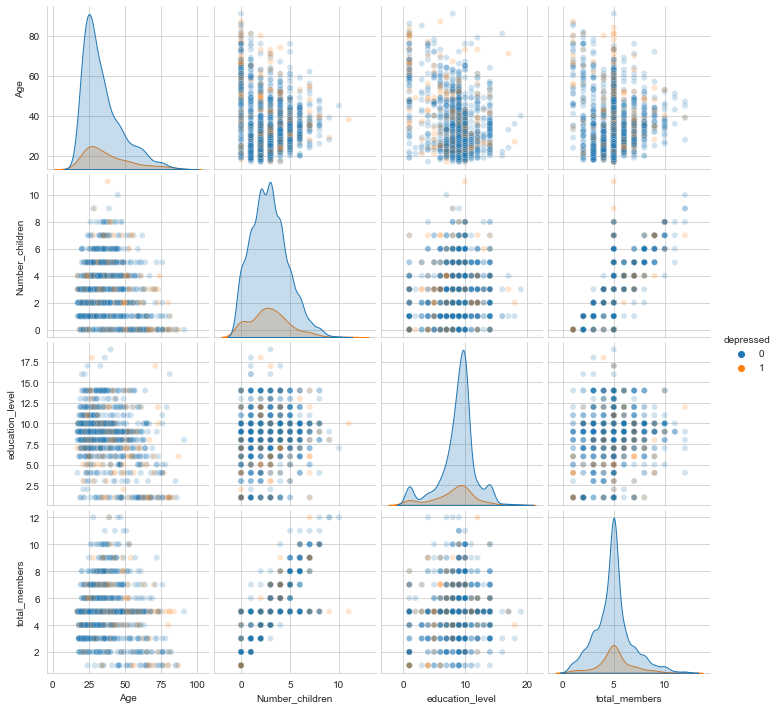

In [25]:
dfPairplot = df.drop(['Survey_id' , 'Married' , 'Ville_id' , 'sex'  , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

the observation in this graph is that the older you and the higher education you the less likely you will get depressed yet children and family members doesn't have the much of an effect

<Figure size 1800x432 with 0 Axes>

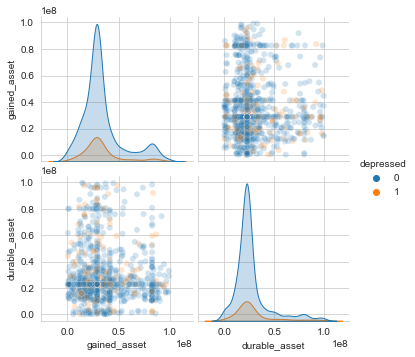

In [26]:
dfPairplot = df.drop(['save_asset','Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

gaining assets is not as much effective as durable assets which consistently bring money to its owner we realize that durable assets increase cause depression

<Figure size 1800x432 with 0 Axes>

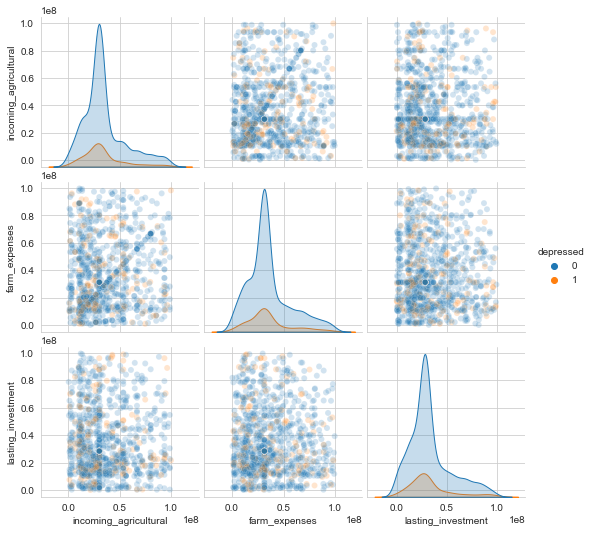

In [27]:
dfPairplot = df.drop(['Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business'  , 'labor_primary'     , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

most of the dataset is not depressed, yet you can notice in some spots depression is fairly distributed in all, yet we can find more males, more married, more with no income

Age Vs Depression

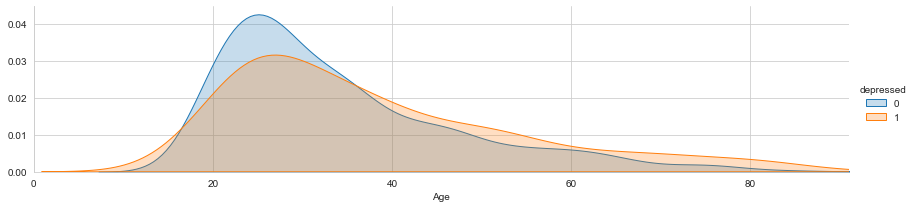

In [28]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()

plt.show()

in the age from 17,18 to age 35,36 its less likely to get depressed than older than 36 and younger than 17



Gain Asset Vs Depression

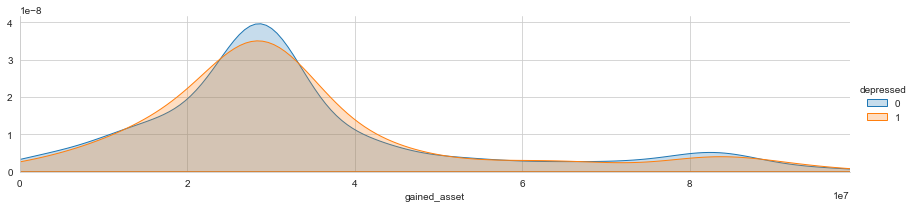

In [29]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'gained_asset', shade=True)
facet.set(xlim=(0,df['gained_asset'].max()))
facet.add_legend()

plt.show()

Durable Asset Vs Depression

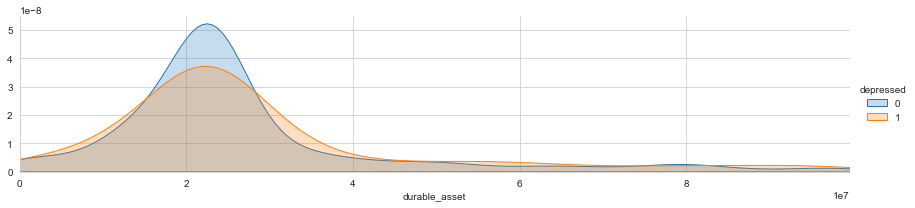

In [30]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'durable_asset', shade=True)
facet.set(xlim=(0,df['durable_asset'].max()))
facet.add_legend()

plt.show()

however people who have from two to 3 durable assets is in favor of being depressed

Incoming Agricultural Vs Depressed

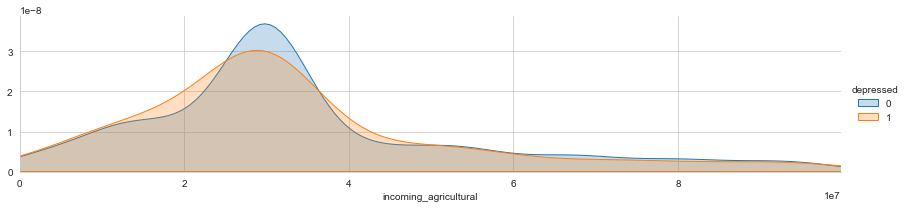

In [31]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'incoming_agricultural', shade=True)
facet.set(xlim=(0,df['incoming_agricultural'].max()))
facet.add_legend()

plt.show()

Farm Expenses Vs Depressed

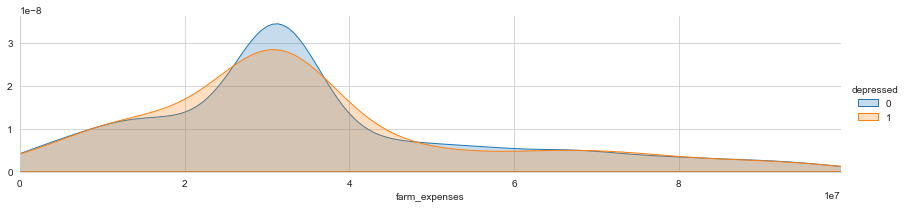

In [32]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'farm_expenses', shade=True)
facet.set(xlim=(0,df['farm_expenses'].max()))
facet.add_legend()

plt.show()

Lasting Investment Vs Depressed

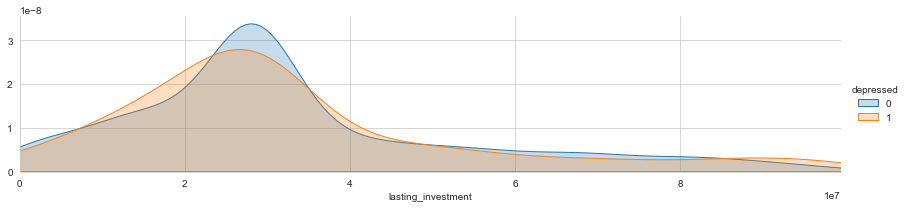

In [33]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'lasting_investment', shade=True)
facet.set(xlim=(0,df['lasting_investment'].max()))
facet.add_legend()

plt.show()


Correlation Matrix between features

In [35]:
dfCorr = df.drop(['no_lasting_investmen'], axis=1)

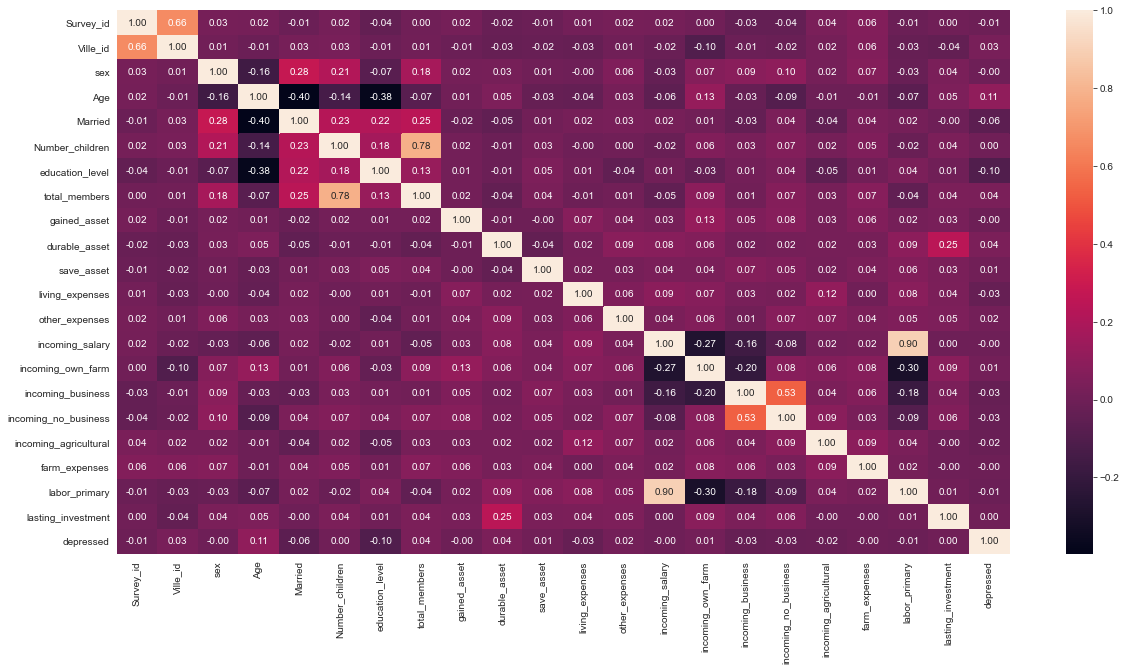

In [36]:
plt.subplots(figsize=(20,10)) 
sns.heatmap(dfCorr.corr(), annot = True, fmt = ".2f")
plt.show()

It is observed that depression is most correlated with age with 0.11(positive correlation) and -0.1 with education(negative correlation)

Drop unneccessary columns

In [38]:
dfDrop = df.drop(['no_lasting_investmen', 'Survey_id', 'Ville_id', 'gained_asset', 'durable_asset', 'save_asset', 'farm_expenses', 'labor_primary', 'Number_children','lasting_investment','incoming_agricultural'], axis=1)

Correlation Matrix

A very common way to describe the data is throught correlation matrix. this is a visual technique to show the relationship between variables od the dataset. The correlation values use to be between -1 and +1. However, in the practice, on the whole the elements have positive correlations.

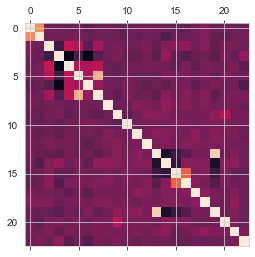

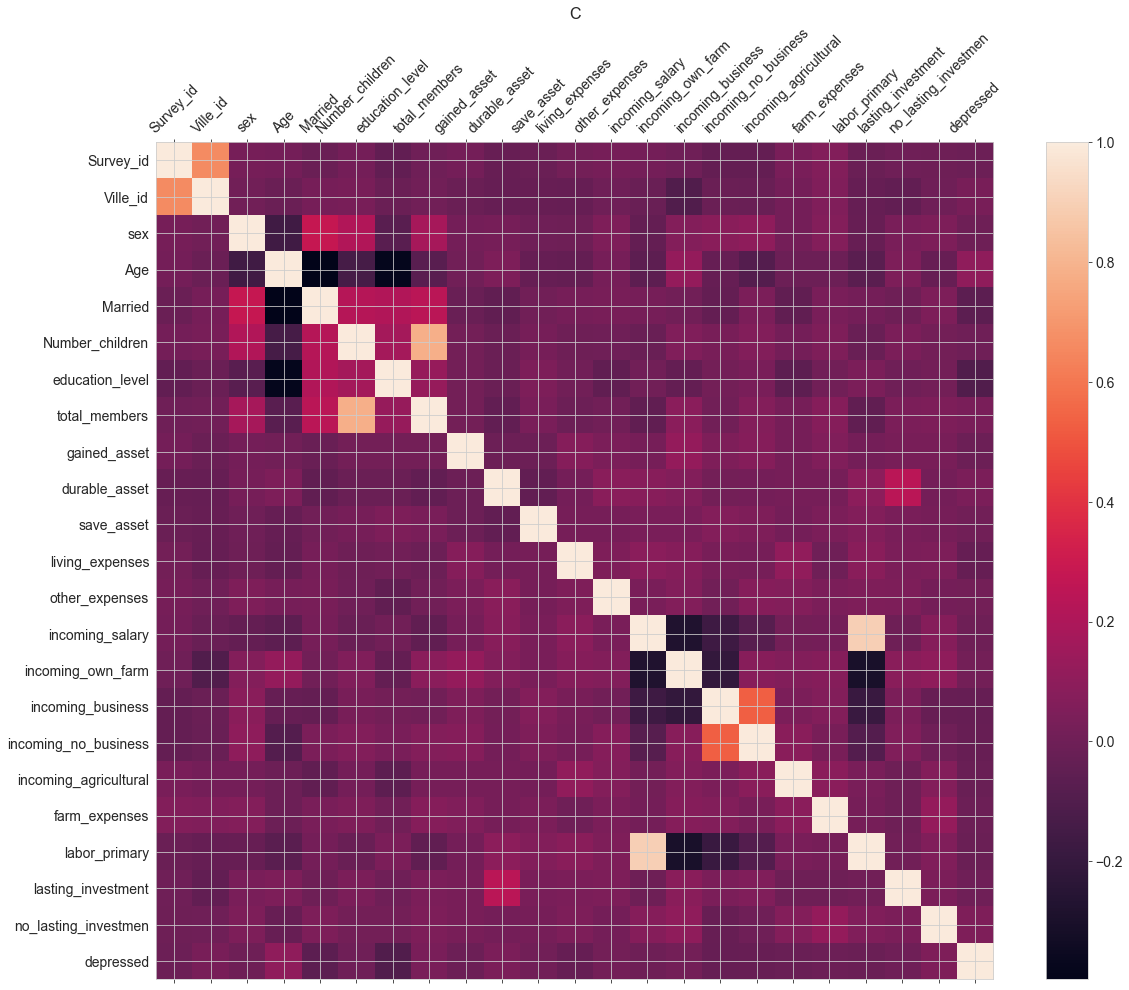

In [82]:

plt.matshow(df.corr())
plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('C',fontsize=16);

RANDOM FOREST MODEL

Learning Curves

Learning curve is a measurement to check how well the model learns. This is measured by taking a reading of the accuracy of the algorithm as it trains and also while it is testing. This are plotting to see the convergence.

In [43]:
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Data Size', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

Validation Curves

Cross validation is a measure of how well our model can generalize from what it learns. How well will it perform with data it has neven seen before. This is done by saving part of the data to later predict and measure the accuracy. The training data is split with differing testing folds to be used. Default in this case is k=5 folds.

In [44]:
def plotValidationCurves(X_train, y_train, classifier, param_name, param_range, title):
    train_scores, test_scores = validation_curve(
        classifier, X_train, y_train, param_name = param_name, param_range = param_range,
        cv=5, scoring="accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(param_range, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")

    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Complexity', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

Confusion Matrix

The confusion matrix shows the frequency for True Positives, True Negatives, False Positives, and False Negative. Also a summary of the different properties can be presented here, along with the accuracy for predicted values.

In [46]:
X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [47]:
rf = RandomForestClassifier(n_estimators = 9,max_depth=3,min_samples_split=9,min_samples_leaf=5)
rf.fit(X_train, y_train)
rf_pred1 = rf.predict(X_test)

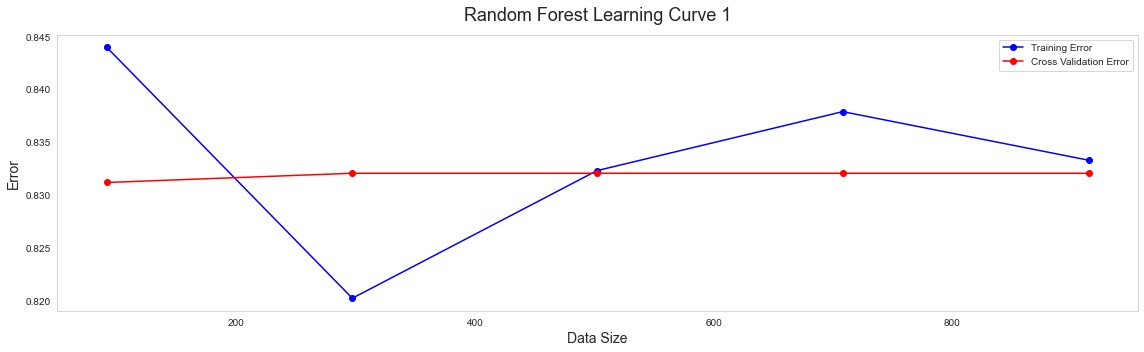

In [48]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 1'
plotLearningCurves(X_train, y_train, rf, title)

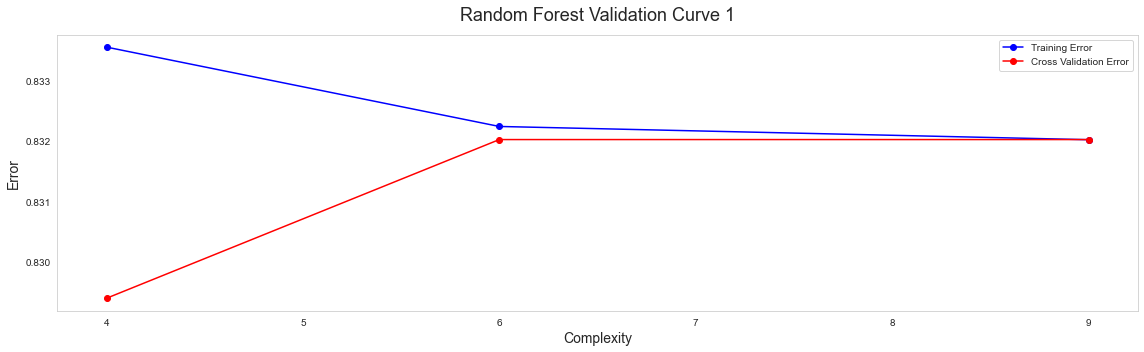

In [49]:
title = 'Random Forest Validation Curve 1'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [50]:
printConfusionMatrix(y_test, rf_pred1)


Confusion Matrix:
[[240   0]
 [ 46   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       240
           1       0.00      0.00      0.00        46

    accuracy                           0.84       286
   macro avg       0.42      0.50      0.46       286
weighted avg       0.70      0.84      0.77       286

Accuracy: 0.8391608391608392


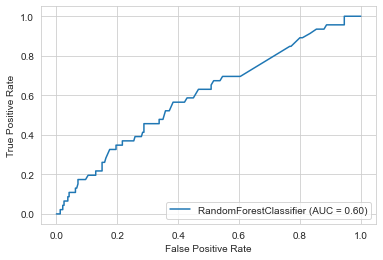

In [51]:
plot_roc_curve(rf, X_test, y_test)
plt.show()


In [52]:
rf = RandomForestClassifier(n_estimators = 9,max_depth=3,criterion='entropy',min_samples_split=9,min_samples_leaf=5)
rf.fit(X_train, y_train)
rf_pred2 = rf.predict(X_test)

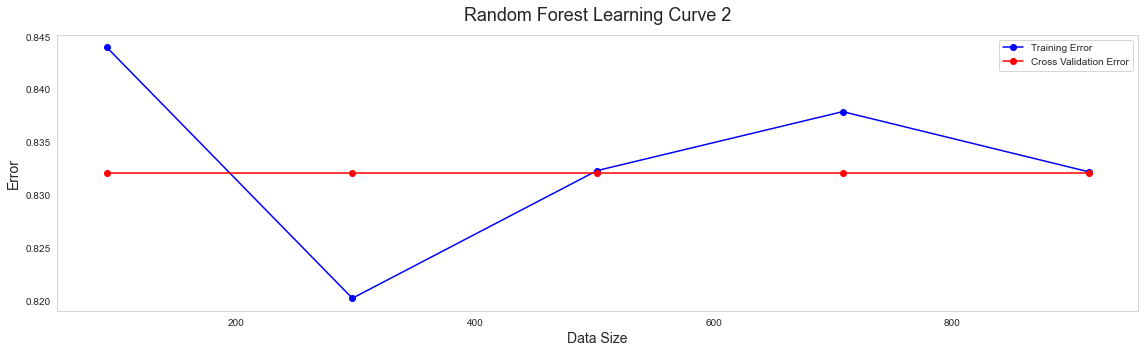

In [53]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 2'
plotLearningCurves(X_train, y_train, rf, title)

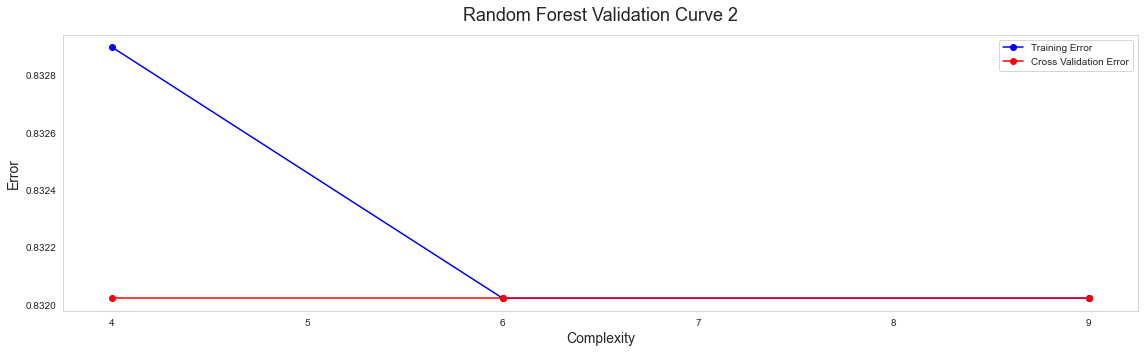

In [54]:
plt.figure(figsize = (16,5))
title = 'Random Forest Validation Curve 2'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)


In [55]:
printConfusionMatrix(y_test, rf_pred2)

Confusion Matrix:
[[240   0]
 [ 46   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       240
           1       0.00      0.00      0.00        46

    accuracy                           0.84       286
   macro avg       0.42      0.50      0.46       286
weighted avg       0.70      0.84      0.77       286

Accuracy: 0.8391608391608392


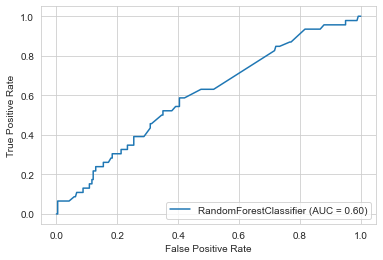

In [56]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [57]:
rf = RandomForestClassifier(n_estimators = 9,max_depth=3,criterion='entropy',min_samples_split=10,min_samples_leaf=5)
rf.fit(X_train, y_train)
rf_pred3 = rf.predict(X_test)

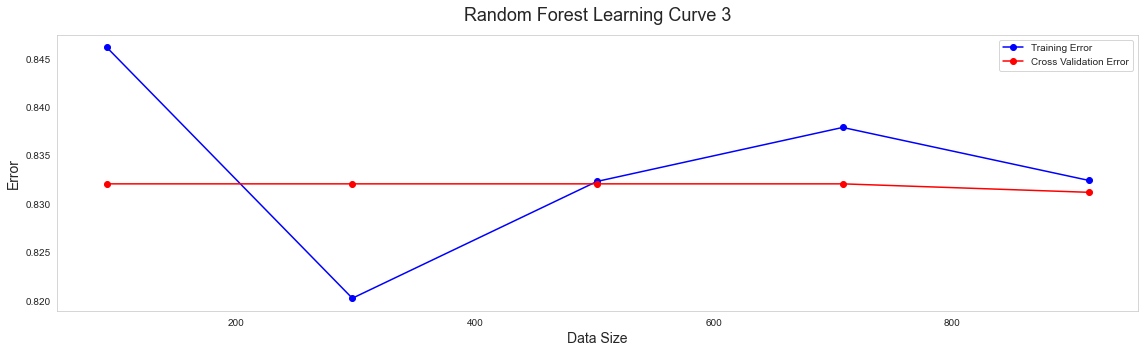

In [58]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 3'
plotLearningCurves(X_train, y_train, rf, title)

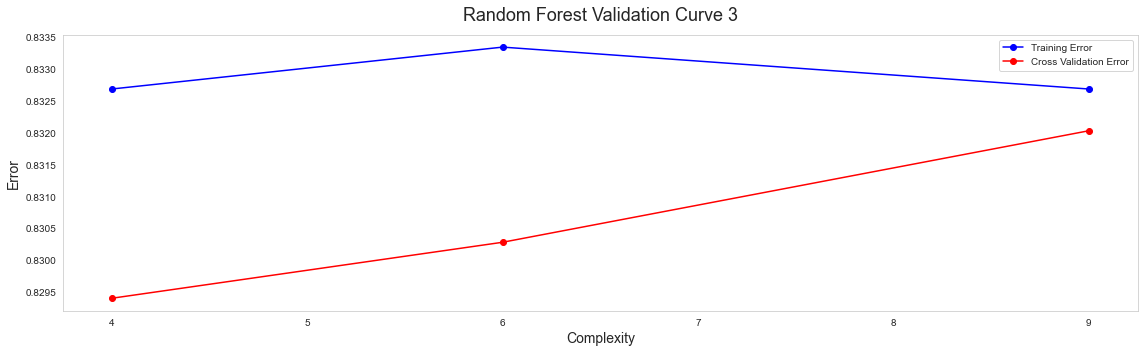

In [59]:
title = 'Random Forest Validation Curve 3'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [60]:
printConfusionMatrix(y_test, rf_pred3)

Confusion Matrix:
[[240   0]
 [ 46   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       240
           1       0.00      0.00      0.00        46

    accuracy                           0.84       286
   macro avg       0.42      0.50      0.46       286
weighted avg       0.70      0.84      0.77       286

Accuracy: 0.8391608391608392


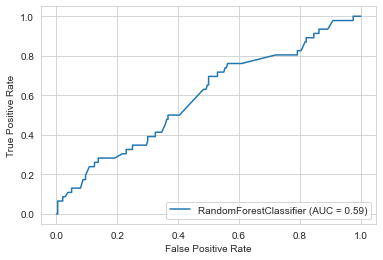

In [61]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

Grid Search Results

In [62]:
Classifier = RandomForestClassifier()
grid_obj = GridSearchCV(Classifier,
                        {'n_estimators': [4, 6, 9],
                         'max_features': ['log2', 'sqrt','auto'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 8],
                         'min_samples_split': [2, 5, 8, 10],
                         'min_samples_leaf': [1, 3, 5]
                        },
                        scoring=make_scorer(accuracy_score))
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
Classifier.fit(X_train, y_train)

predictions = Classifier.predict(X_test)

print("Best Params: " , grid_obj.best_estimator_)
print("Best Score: " , grid_obj.best_score_)

Best Params:  RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=4)
Best Score:  0.834647207538497


K-Nearest Neighbour

In [63]:
X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [64]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred1=knn.predict(X_test)

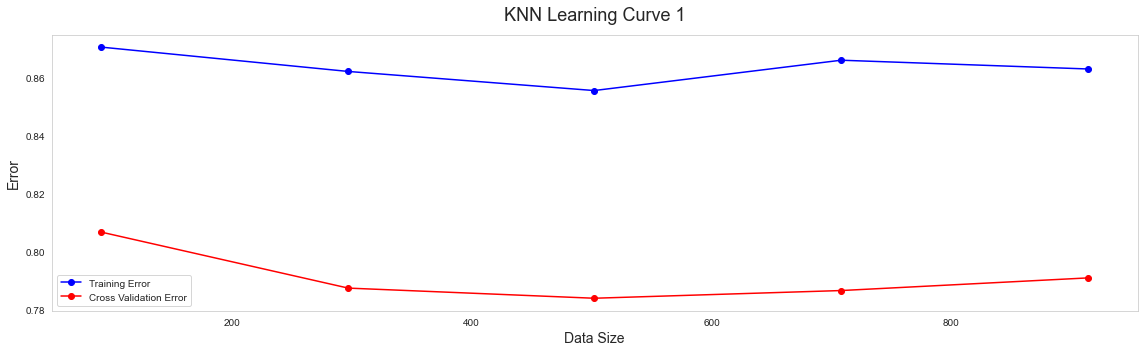

In [65]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 1'
plotLearningCurves(X_train,y_train,knn,title)

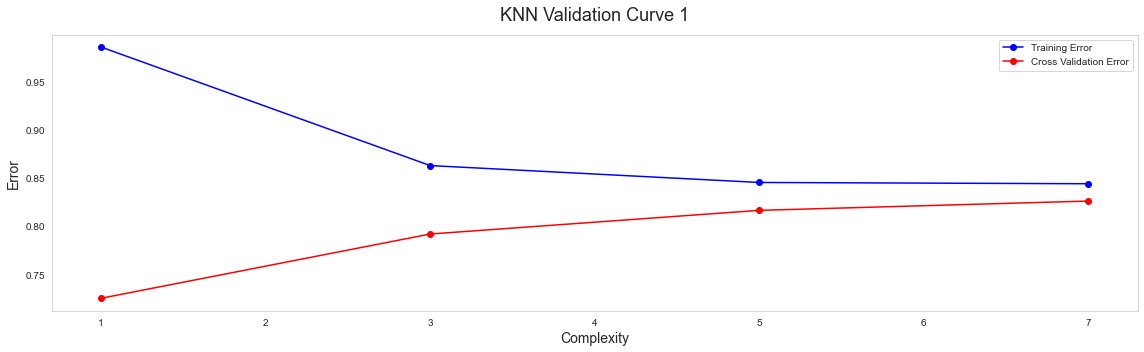

In [66]:
title = 'KNN Validation Curve 1' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [67]:
printConfusionMatrix(y_test, knn_pred1)

Confusion Matrix:
[[218  15]
 [ 49   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       233
           1       0.21      0.08      0.11        53

    accuracy                           0.78       286
   macro avg       0.51      0.51      0.49       286
weighted avg       0.70      0.78      0.73       286

Accuracy: 0.7762237762237763


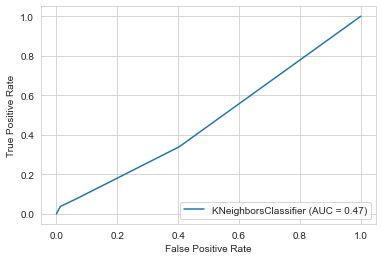

In [68]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [69]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred2=knn.predict(X_test)

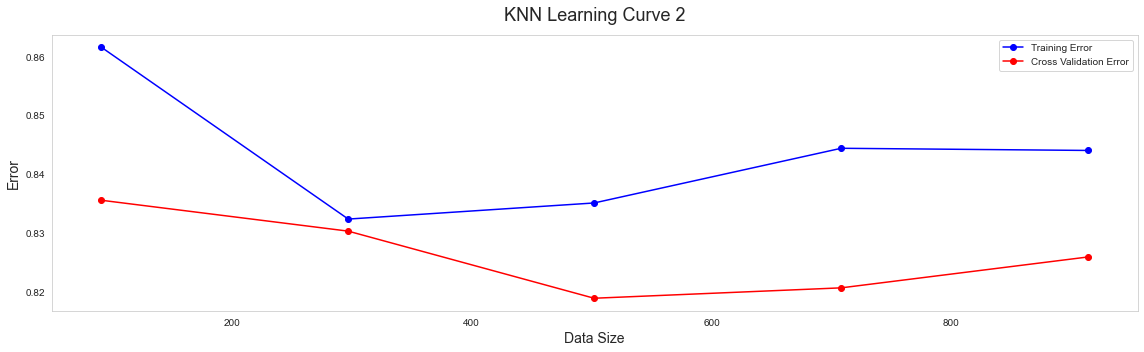

In [70]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 2'
plotLearningCurves(X_train,y_train,knn,title)

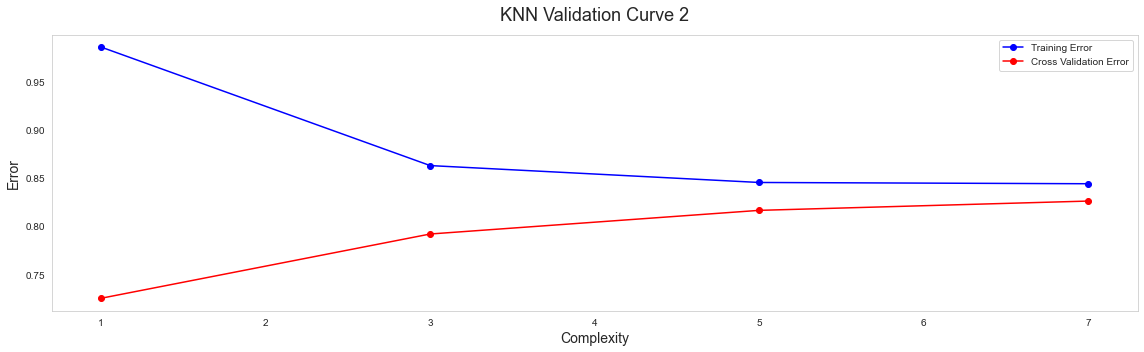

In [71]:
title = 'KNN Validation Curve 2' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [72]:
printConfusionMatrix(y_test, knn_pred2)

Confusion Matrix:
[[226   7]
 [ 50   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       233
           1       0.30      0.06      0.10        53

    accuracy                           0.80       286
   macro avg       0.56      0.51      0.49       286
weighted avg       0.72      0.80      0.74       286

Accuracy: 0.8006993006993007


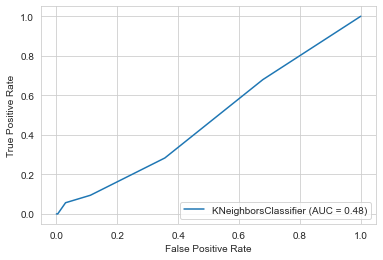

In [73]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [74]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=10)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred3=knn.predict(X_test)

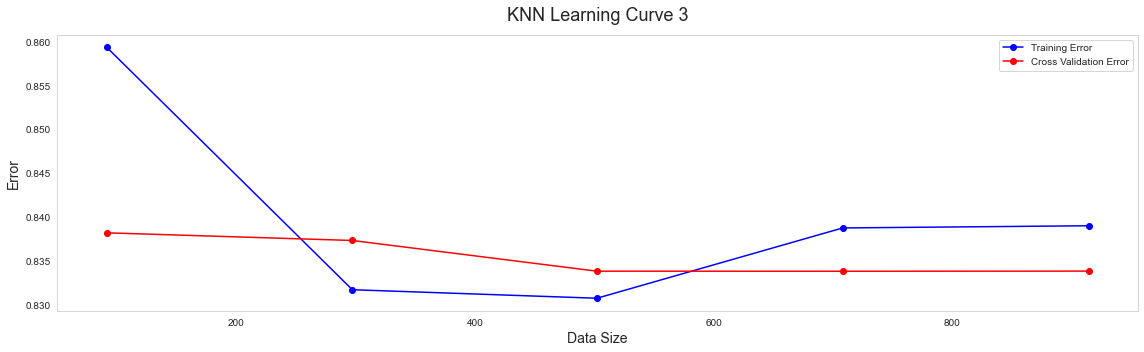

In [75]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 3'
plotLearningCurves(X_train,y_train,knn,title)

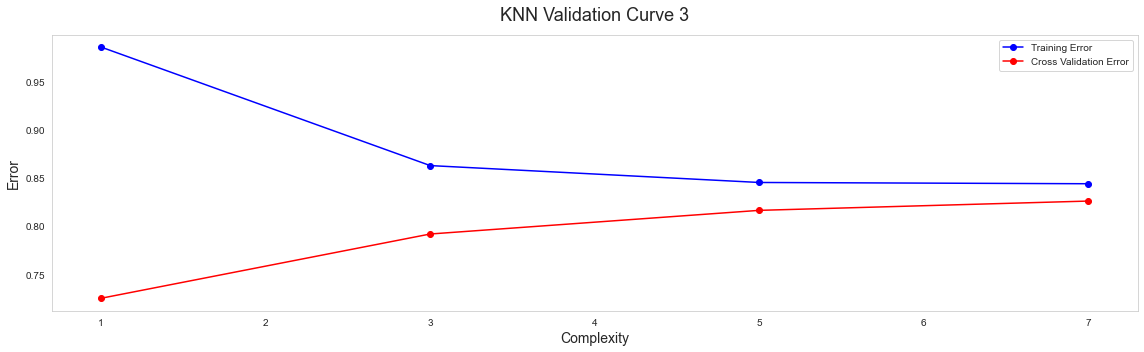

In [76]:
title = 'KNN Validation Curve 3' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [77]:
printConfusionMatrix(y_test, knn_pred3)

Confusion Matrix:
[[233   0]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       233
           1       0.00      0.00      0.00        53

    accuracy                           0.81       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.66      0.81      0.73       286

Accuracy: 0.8146853146853147


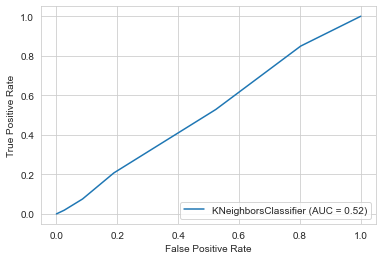

In [78]:
plot_roc_curve(knn, X_test, y_test)
plt.show()